In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from helper import *

In [14]:
coords = np.array([0.0, 1.0, 2.0, 3.0, 4.0])

Ie = getIe(coords)
Ie

array([[ 1.30291005, -1.81164021,  0.80634921, -0.38941799,  0.09179894],
       [-1.81164021,  4.4021164 , -3.75873016,  1.55767196, -0.38941799],
       [ 0.80634921, -3.75873016,  5.9047619 , -3.75873016,  0.80634921],
       [-0.38941799,  1.55767196, -3.75873016,  4.4021164 , -1.81164021],
       [ 0.09179894, -0.38941799,  0.80634921, -1.81164021,  1.30291005]])

In [14]:
N = 20
global_coords = np.linspace(0, 0.1, N)
nodes = list(range(N))
elements = list(range(N-1))

local_nodes = []
for e in elements:
    local_nodes.append([e,e+1])

for e in elements:
    print(e, local_nodes[e], global_coords[local_nodes[e]])

0 [0, 1] [ 0.          0.00526316]
1 [1, 2] [ 0.00526316  0.01052632]
2 [2, 3] [ 0.01052632  0.01578947]
3 [3, 4] [ 0.01578947  0.02105263]
4 [4, 5] [ 0.02105263  0.02631579]
5 [5, 6] [ 0.02631579  0.03157895]
6 [6, 7] [ 0.03157895  0.03684211]
7 [7, 8] [ 0.03684211  0.04210526]
8 [8, 9] [ 0.04210526  0.04736842]
9 [9, 10] [ 0.04736842  0.05263158]
10 [10, 11] [ 0.05263158  0.05789474]
11 [11, 12] [ 0.05789474  0.06315789]
12 [12, 13] [ 0.06315789  0.06842105]
13 [13, 14] [ 0.06842105  0.07368421]
14 [14, 15] [ 0.07368421  0.07894737]
15 [15, 16] [ 0.07894737  0.08421053]
16 [16, 17] [ 0.08421053  0.08947368]
17 [17, 18] [ 0.08947368  0.09473684]
18 [18, 19] [ 0.09473684  0.1       ]


In [15]:
A = np.zeros((N, N))

for element in elements:
    A[element:element+2, element:element+2] += getIe(global_coords[local_nodes[element]])

# A

In [16]:
A[0, 0] = 1
A[0, 1:] = 0

A[-1, -1] = 1
A[-1, :-1] = 0

# A

In [17]:
b = np.zeros((N,1))
b[0] = 1
# b

In [18]:
sol = np.linalg.solve(A, b)
# sol

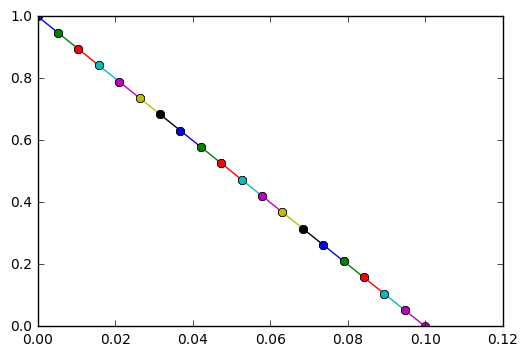

In [19]:
for e in elements:
    x = global_coords[local_nodes[e]]
    y = sol[local_nodes[e]]
    plt.plot(x, y, 'o-')

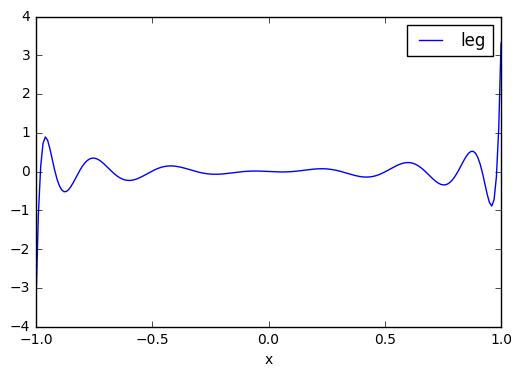

In [66]:
def strip(text):
    try:
        return np.float64(text.strip())
    except AttributeError:
        return text

leg = pd.read_csv('leg.csv', 
                  names=['x', 'leg', 'legx'], 
                  converters = {'x' : strip,
                                'legx' : strip,
                                'leg' : strip})
leg.plot('x' , ['leg'])